# <center> <span style='color:navy'>INTRO TO RIEMANN SUMS AND APPROXIMATING INTEGRALS</span> 

One of the big tasks in Calculus is to find the area of a region that is bounded by the graphs of functions. In order to accomplish this task, we'll apply the 'divide and conquer' strategy once again. 

<font size="4"><span style='color:green'> <b>Example 1.</b></span></font> Let $R$ be the region bounded by the graph of $f(x)=1+x^2$ and the $x$-axis between $x=0$ and $x=10$. Estimate the area of the region $R$.

In [9]:
#Import the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
import ipywidgets as widgets

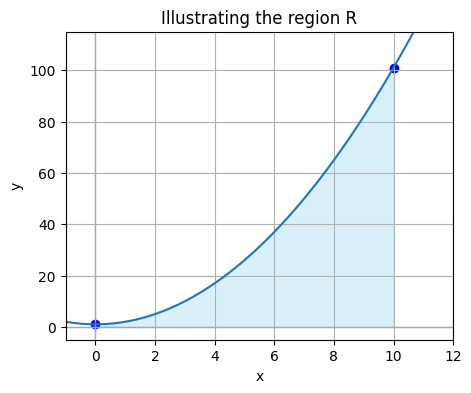

In [10]:
#Define our function
def f(x):
    return 1+x**2

#linspace takes 50 values from -1, up to 12 (but not including 12)
#Curve
x = np.linspace(-1, 12, 50)
y = f(x)

#linspace takes 50 values from 0, up to 10 (but not including 10)
#Shading
X = np.linspace(0, 10, 50)
Y = f(X)

#bounds on the interval of interest
a=0
b=10

plt.figure(figsize=(5, 4))
plt.xlim(-1, 12) #restricts the x-axis
plt.ylim(-5, 115) #restricts the y axis
plt.axhline(0, color='darkgray', linewidth=1)
plt.axvline(0, color='darkgray', linewidth=1)
plt.fill_between(X, Y, color='skyblue', alpha=0.3)
plt.scatter(a, f(a), color='blue', label='Point (a, f(a))')
plt.scatter(b, f(b), color='blue', label='Point (b, f(b))')
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Illustrating the region R")
plt.show()

To estimate the shaded area above, we start by subdividing the region R into smaller regions (at first rectangular), whose areas we can calculate. Adding up the areas of the individual rectangles gives us <b>an</b> estimate of the area of the region R (this sum is known as a <b>Riemann sum</b>).  

In [12]:
a=0
b=10

@widgets.interact_manual(n=(1, 25))
def riemann_plot(n):
    #a = 0 
    #b = 10
    #width=delta_x=length of subinterval
    del_x=(b-a)/n
    
    #linspace in NumPy returns an array of evenly spaced values over a specified interval np.linspace(start,stop,num)
    
    #For plotting the rectangles
    x_rec = np.linspace(a,b,n+1)
    y_rec = f(x_rec)

    #For plotting the curve
    X_fn = np.linspace(a,b,100)
    Y_fn = f(X_fn)

    plt.figure(figsize=(16,5))
    plt.subplot(1,3,1)
    plt.plot(X_fn,Y_fn,'r')

    #Left endpoints on each subinterval('Left Riemann Sum')
    x_left = x_rec[:-1] 
    y_left = y_rec[:-1]
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.bar(x_left,y_left,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_left*(del_x))
    plt.title('Left Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Midpoints of each subinterval('Midpoint Riemann Sum')
    plt.subplot(1,3,2)
    plt.plot(X_fn,Y_fn,'r')
    x_mid = (x_rec[:-1] + x_rec[1:])/2
    #print(x_rec)
    #print(x_rec[:-1])
    #print(x_rec[1:])
    #print(x_mid)
    y_mid = f(x_mid)
    plt.plot(x_mid,y_mid,'b.',markersize=10)
    plt.bar(x_mid,y_mid,width=del_x,alpha=0.2,edgecolor='b', color='gray')
    #HERE
    for i in range(len(x_mid)):
        m = x_mid[i]
        plt.plot([m, m], [0, y_mid[i]], color='gray', linestyle='--', alpha=0.5)
    area = np.sum(y_mid*(del_x))
    plt.title('Midpoint Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Right endpoints on each subinterval ('Right Riemann Sum')
    plt.subplot(1,3,3)
    plt.plot(X_fn,Y_fn,'r')
    x_right = x_rec[1:] 
    y_right = y_rec[1:]
    plt.plot(x_right,y_right,'b.',markersize=10)
    plt.bar(x_left,y_right,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_right*(del_x))
    plt.title('Right Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))
    plt.show()
    
    
#-----------------------------------------   
#Computing the exact area under f on [a,b]  

#Define the function 
def f(x):
    return 1+x**2

#for sympy, we need to define x as a symbol
x_sym=sp.symbols('x')
f_sym=1+x_sym**2
exact_area=sp.integrate(f_sym,(x_sym,a,b))
print('For comparison: Exact Area =',exact_area,'≈',float(exact_area))


interactive(children=(IntSlider(value=13, description='n', max=25, min=1), Button(description='Run Interact', …

For comparison: Exact Area = 1030/3 ≈ 343.3333333333333


In summary, we can estimate the area of the region $R$ that lies under the graph of a continuous function $f$ on $[a,b]$ by summing the areas of the approximating rectangles. Symbollically, we can write a Riemann sum as:

<center>
$\text{Area of R} \approx f(x_1*)\Delta x + f(x_2*)\Delta x +...+f(x_n*)\Delta x = \displaystyle{\sum_{i=1}^n}{f(x_i*)\Delta x}$,
</center>

where

$n$ is the number of rectangles used,

$x_1*, x_2*, ..., x_n*$, are <b>sample points</b> on each subinterval or $x_i*\in [x_{i-1},x_i]$, where $i=1, 2, ..., n$

$f(x_1*), f(x_2*), ..., f(x_n*)$ are the heights of the rectangles, and

$\Delta x = \dfrac{b-a}{n}$ is the width of each of the subintervals (regular partition).

Note: The product $f(x_i*)\Delta x$ represents the area of the $i$-th rectangle.



While the sample points on each subinterval can be arbitrary, we generrally choose the following (as we did above in the three figures):

<ul> 
    <li><b>Left Riemann Sum</b> when $x_i*$ is the left endpoint of $[x_{i-1},x_i]$: $ x_i* = a+(i-1)\Delta x $ </li>
                                            
</ul> 

<ul>
    <li><b>Right Riemann Sum</b> when $x_i*$ is the right endpoint of $[x_{i-1},x_i]$:  $x_i* = a+ i\Delta x$</li>
</ul>
<ul>
    <li><b>Midpoint Riemann Sum</b> when $x_i*$ is the midpoint endpoint of $[x_{i-1},x_i]$:  $x_i* = a+\left(i-\frac{1}{2}\right)\Delta x$</li>
</ul>

<font size="4"><span style='color:green'> <b>Question 1.</b></span></font> Discuss whether the Riemann Sum is an overestimate, underestimate, or equal to the exact area under the curve in each of the three cases. 

Discuss the relationship between the accuracy of the approximation and the number of rectangles used to do the approximation.


In [13]:
#Space left for answers 

---

<font size="4"><span style='color:green'> <b>Example 2.</b></span></font> Estimate the area under the graph of $F(x)=x+\cos(2x)$ on $[0,10]$.

In [15]:
a = 0 
b = 10

@widgets.interact_manual(n=(1, 25))
def riemann_plot(n):
    #a = 0 
    #b = 10
    del_x=(b-a)/n

    #delta_x=length of subinterval
    #width = delta_x=(b-a)/n

    #linspace in NumPy returns an array of evenly spaced values over a specified interval np.linspace(start,stop,num)
    
    #The rectangles
    x = np.linspace(a,b,n+1)
    y = F(x)

    #The curve
    X = np.linspace(a,b,100)
    Y = F(X)
    
    #Shading the exact region
    #XE = np.linspace(a,b,100)
    #YE = F(XE)

    plt.figure(figsize=(16,5))

    plt.subplot(1,3,1)
    plt.plot(X,Y,'r')

    #Left endpoints on each subinterval
    #plt.fill_between(XE, YE, color='yellow', alpha=0.3)
    x_left = x[:-1] 
    y_left = y[:-1]
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.bar(x_left,y_left,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_left*(del_x))
    plt.title('Left Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Midpoints of each subinterval
    plt.subplot(1,3,2)
    plt.plot(X,Y,'r')
    x_mid = (x[:-1] + x[1:])/2
    #print(x)
    #print(x[:-1])
    #print(x[1:])
    #print(x_mid)
    y_mid = F(x_mid)
    plt.plot(x_mid,y_mid,'b.',markersize=10)
    plt.bar(x_mid,y_mid,width=del_x,alpha=0.2,edgecolor='b', color='gray')
    for i in range(len(x_mid)):
        m = x_mid[i]
        plt.plot([m, m], [0, y_mid[i]], color='gray', linestyle='--', alpha=0.5)
    area = np.sum(y_mid*(del_x))
    plt.title('Midpoint Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Right endpoints on each subinterval
    plt.subplot(1,3,3)
    plt.plot(X,Y,'r')
    x_right = x[1:] 
    y_right = y[1:]
    plt.plot(x_right,y_right,'b.',markersize=10)
    plt.bar(x_left,y_right,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_right*(del_x))
    plt.title('Right Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))
    plt.show()

    
#Define the function 
def F(x):
    return x+np.cos(2*x)

#Computing the exact area under f on [a,b]
x_sym=sp.symbols('x')
F_sym=x_sym+cos(2*x_sym)
exact_area=sp.integrate(F_sym,(x_sym,a,b))
print('Exact Area =',exact_area,'≈',float(exact_area))

interactive(children=(IntSlider(value=13, description='n', max=25, min=1), Button(description='Run Interact', …

Exact Area = sin(20)/2 + 50 ≈ 50.456472625363816


The figures below overlay shading of the exact area that we are trying to approximate (yellow), with shading of the sum of the areas of the approximating rectangles (gray). 

In [17]:
a = 0 
b = 10

@widgets.interact_manual(n=(1, 25))
def riemann_plot(n):
    #a = 0 
    #b = 10
    del_x=(b-a)/n

    #delta_x=length of subinterval
    #width = delta_x=(b-a)/n

    #linspace in NumPy returns an array of evenly spaced values over a specified interval np.linspace(start,stop,num)
    
    #The rectangles
    x = np.linspace(a,b,n+1)
    y = F(x)

    #The curve
    X = np.linspace(a,b,100)
    Y = F(X)
    
    #Shading the exact region
    XE = np.linspace(a,b,100)
    YE = F(XE)

    plt.figure(figsize=(16,5))

    plt.subplot(1,3,1)
    plt.plot(X,Y,'r')

    #Left endpoints on each subinterval
    x_left = x[:-1] 
    y_left = y[:-1]
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.bar(x_left,y_left,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    plt.fill_between(XE, YE, color='yellow', alpha=0.3) #shading exact region
    area = np.sum(y_left*(del_x))
    plt.title('Left Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Midpoints of each subinterval
    plt.fill_between(XE, YE, color='gold', alpha=0.3) #shading exact region
    plt.subplot(1,3,2)
    plt.plot(X,Y,'r')
    x_mid = (x[:-1] + x[1:])/2
    #print(x)
    #print(x[:-1])
    #print(x[1:])
    #print(x_mid)
    y_mid = F(x_mid)
    plt.fill_between(XE, YE, color='gold', alpha=0.3) #shading exact region
    plt.plot(x_mid,y_mid,'b.',markersize=10)
    plt.bar(x_mid,y_mid,width=del_x,alpha=0.2,edgecolor='b', color='gray')
    for i in range(len(x_mid)):
        m = x_mid[i]
        plt.plot([m, m], [0, y_mid[i]], color='gray', linestyle='--', alpha=0.5)
    area = np.sum(y_mid*(del_x))
    plt.title('Midpoint Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Right endpoints on each subinterval
    plt.subplot(1,3,3)
    plt.plot(X,Y,'r')
    x_right = x[1:] 
    y_right = y[1:]
    plt.fill_between(XE, YE, color='gold', alpha=0.3) #shading exact region
    plt.plot(x_right,y_right,'b.',markersize=10)
    plt.bar(x_left,y_right,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_right*(del_x))
    plt.title('Right Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))
    plt.show()

    
#Define the function 
def F(x):
    return x+np.cos(2*x)

#Computing the exact area under f on [a,b]
x_sym=sp.symbols('x')
F_sym=x_sym+cos(2*x_sym)
exact_area=sp.integrate(F_sym,(x_sym,a,b))
print('Exact Area =',exact_area,'≈',float(exact_area))

interactive(children=(IntSlider(value=13, description='n', max=25, min=1), Button(description='Run Interact', …

Exact Area = sin(20)/2 + 50 ≈ 50.456472625363816


<font size="4"><span style='color:green'> <b>Question 2.</b></span></font>  Discuss whether each of the Riemann sums is an overestimate, underestimate, or equal to the exact area under the curve.

Discuss the relationship between the accuracy of the approximation and the number of rectangles used to do the approximation.

In [18]:
# Space for answers

---

If the function $f$ is not necessarily positive on $[a,b]$, then the Riemann sums give us an approximation of the <b>net area</b> (area above the $x$-axis - area below the $x$-axis). 

---

<font size="4"><span style='color:green'> <b>Example 3.</b></span></font> Estimate the net area between the graph of $H(x)=\sin(x)-\frac{1}{2}$ and the $x$-axis on $[0,10]$.

In [20]:
@widgets.interact_manual(n=(1, 35))
def riemann_plot(n):
    a = 0 
    b = 10

    #delta_x=length of subinterval
    #width = del_x=(b-a)/n
    del_x=(b-a)/n
    #linspace in NumPy returns an array of evenly spaced values over a specified interval np.linspace(start,stop,num)
    
    #The rectangles
    x = np.linspace(a,b,n+1)
    y = g(x)

    #The curve
    X = np.linspace(a,b,100)
    Y = g(X)

    plt.figure(figsize=(16,5))

    plt.subplot(1,3,1)
    plt.plot(X,Y,'r')

    #Left endpoints on each subinterval
    x_left = x[:-1] 
    y_left = y[:-1]
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.bar(x_left,y_left,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_left*(del_x))
    plt.title('Left Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Midpoints of each subinterval
    plt.subplot(1,3,2)
    plt.plot(X,Y,'r')
    x_mid = (x[:-1] + x[1:])/2
    #print(x)
    #print(x[:-1])
    #print(x[1:])
    #print(x_mid)
    y_mid = g(x_mid)
    plt.plot(x_mid,y_mid,'b.',markersize=10)
    plt.bar(x_mid,y_mid,width=del_x,alpha=0.2,edgecolor='b', color='gray')
    for i in range(len(x_mid)):
        m = x_mid[i]
        plt.plot([m, m], [0, y_mid[i]], color='gray', linestyle='--', alpha=0.5)
    area = np.sum(y_mid*(del_x))
    plt.title('Midpoint Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))

    #Right endpoints on each subinterval
    plt.subplot(1,3,3)
    plt.plot(X,Y,'r')
    x_right = x[1:] 
    y_right = y[1:]
    plt.plot(x_right,y_right,'b.',markersize=10)
    plt.bar(x_left,y_right,width=del_x,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = np.sum(y_right*(del_x))
    plt.title('Right Riemann Sum, n = {0}, Area = {1:.2f}'.format(n, area))
    plt.show()

    
#Define the function 
def g(x):
    return np.sin(x)-1/2

#Computing the exact area under f on [a,b]
x_sym=sp.symbols('x')
g_sym=sin(x_sym)-1/2
exact_area=sp.integrate(g_sym,(x_sym,a,b))
print('Exact Area =',exact_area,'≈',float(exact_area))


interactive(children=(IntSlider(value=18, description='n', max=35, min=1), Button(description='Run Interact', …

Exact Area = -4.0 - cos(10) ≈ -3.1609284709235475


## <center> <span style='color:navy'>TRAPEZOIDAL RULE</span> 

Another way to approximate the area is to use trapezoids, rather than rectangles. The formula for the Trapezoidal Approximation is:

<div style="background-color:lightgray">
<b>Trapezoidal Approximation:</b>    
$$ \approx \dfrac{b - a}{2} \dfrac{ \left[f(a) + f(b)] + (f(a + Δx) + f(a + 2Δx) + ... + f(a + (n - 1)Δx)\right]}{2}$$

In [21]:
import matplotlib.patches as patches

a=0
b=10

@widgets.interact_manual(n=(1, 25))
def riemann_plot(n):
    
    #The rectangles
    x = np.linspace(a,b,n+1)
    y = f(x)

    #The curve
    X = np.linspace(a,b,100)
    Y = f(X)

    #width
    del_x = (b - a) / n
    
    fig = plt.figure(figsize=(14,9))
    plt.subplot(1,1,1)
   

    #Left endpoints on each subinterval
    x_left = x[:-1] 
    y_left = y[:-1]
    y_right = y[1:]
    
    
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.plot(X,Y,'r')
    
    for i, xl in enumerate(x_left):

        # Parallelogram
        xi = [xl, xl + del_x, xl + del_x, xl]
        yi = [0.0, 0.0, y[i+1], y[i]]

        ax = fig.axes[0]
        ax.add_patch(
            ax.add_patch(patches.Polygon(xy=list(zip(xi,yi)),
                                         fill=True,
                                         facecolor='lightgray',
                                         alpha=0.5,
                                         edgecolor='b'))
        )
    
    #plt.bar(x_left,y_left,width=dx,alpha=0.2,align='edge',edgecolor='b', color='gray')
    area = del_x*np.sum((y_left + y_right)/2.0)
    plt.title('Trapezoid Rule Sum, n = {0}, Area = {1:.2f}'.format(n, area))
    plt.show()

    
#Define the function 
def f(x):
    return x+np.cos(2*x)

#Computing the exact area under f on [a,b]
x_sym=sp.symbols('x')
f_sym=x_sym+cos(2*x_sym)
exact_area=sp.integrate(f_sym,(x_sym,a,b))
print('Exact Area =',exact_area,'≈',float(exact_area))


interactive(children=(IntSlider(value=13, description='n', max=25, min=1), Button(description='Run Interact', …

Exact Area = sin(20)/2 + 50 ≈ 50.456472625363816


<font size="4"><span style='color:green'> <b>Question.</b></span></font> When does the Trapezoidal Rule give us an overestimate and when does it give us an underestimate? 